<a href="https://colab.research.google.com/github/Rob85225/CSC-115/blob/main/4_1_Statistical_Computations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Iris from seaborn’s built-in datasets
iris = sns.load_dataset('iris')

The Iris dataset contains 150 samples with four numeric measurements and one categorical species label.

In [ ]:
print("Shape:", iris.shape)
print("Columns:", iris.columns.tolist())

Shape: (150, 5)
Columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


There are 150 rows and 5 columns, confirming four features and one target variable.

In [ ]:
missing = iris.isnull().sum()
print("Missing values per column:\n", missing)

Missing values per column:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


There are no missing values, so we can proceed with full-data analysis.

In [ ]:
print(iris.info())
print(iris.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50000

All feature columns are floats and the summary shows plausible ranges for sepal and petal dimensions.

In [ ]:
stats_df = iris.describe().T[['mean','50%','std','min','max']]
stats_df.rename(columns={'50%':'median'}, inplace=True)
stats_df['mode'] = iris.mode().iloc[0]
stats_df['variance'] = iris.var(numeric_only=True)
stats_df

,mean,median,std,min,max,mode,variance
sepal_length,5.843333,5.80,0.828066,4.3,7.9,5.0,0.685694
sepal_width,3.057333,3.00,0.435866,2.0,4.4,3.0,0.189979
petal_length,3.758000,4.35,1.765298,1.0,6.9,1.4,3.116278
petal_width,1.199333,1.30,0.762238,0.1,2.5,0.2,0.581006


Sepal length has a mean of 5.84 cm and a standard deviation of 0.83 cm, indicating moderate spread.

In [ ]:
quantiles = iris.quantile([0.25, 0.5, 0.75], numeric_only=True).T
quantiles.columns = ['25th', '50th', '75th']
quantiles

,25th,50th,75th
sepal_length,5.1,5.80,6.4
sepal_width,2.8,3.00,3.3
petal_length,1.6,4.35,5.1
petal_width,0.3,1.30,1.8


The interquartile range for petal length (4th column) spans from 1.60 cm to 5.10 cm.

In [ ]:
skew_kurt = pd.DataFrame({
    'skewness': iris.skew(numeric_only=True),
    'kurtosis': iris.kurtosis(numeric_only=True)
})
skew_kurt

,skewness,kurtosis
sepal_length,0.314911,-0.552064
sepal_width,0.318966,0.228249
petal_length,-0.274884,-1.402103
petal_width,-0.102967,-1.340604


Petal measurements are positively skewed, reflecting a longer right tail in distribution.

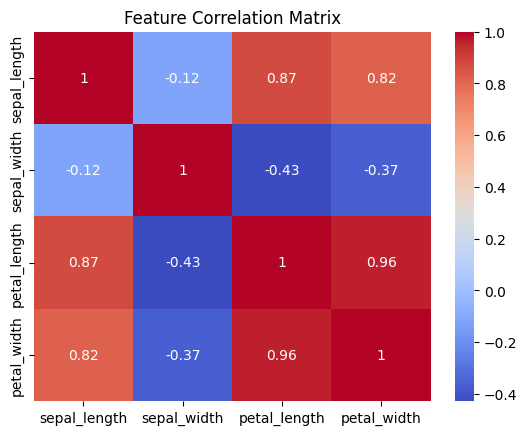

In [ ]:
corr = iris.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

Petal length and petal width have a very strong positive correlation (≈ 0.96).

In [ ]:
group_stats = iris.groupby('species').agg(['mean', 'std'])
group_stats

sepal_length           sepal_width           petal_length  \
                   mean       std        mean       std         mean   
species                                                                
setosa            5.006  0.352490       3.428  0.379064        1.462   
versicolor        5.936  0.516171       2.770  0.313798        4.260   
virginica         6.588  0.635880       2.974  0.322497        5.552   

                     petal_width            
                 std        mean       std  
species                                     
setosa      0.173664       0.246  0.105386  
versicolor  0.469911       1.326  0.197753  
virginica   0.551895       2.026  0.274650

Iris-virginica has the largest average petal dimensions among the three species.

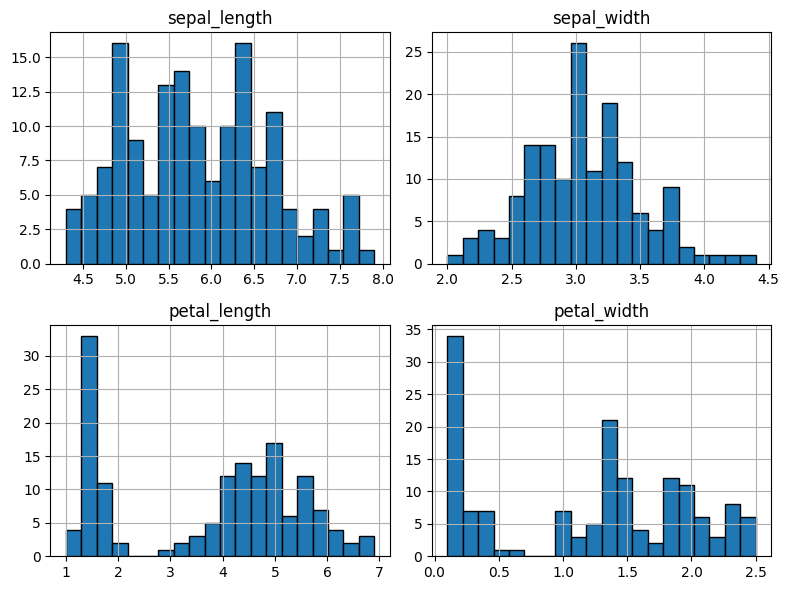

In [ ]:
iris.hist(figsize=(8,6), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

Sepal width appears more tightly clustered than other measurements.

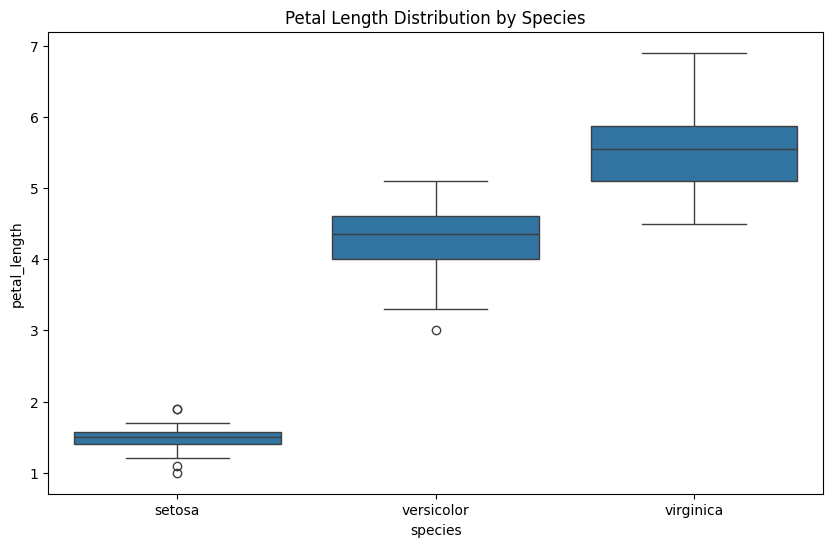

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='species', y='petal_length', data=iris)
plt.title('Petal Length Distribution by Species')
plt.show()

 Iris-setosa’s petal length is distinctly smaller, with almost no overlap with the other two species.

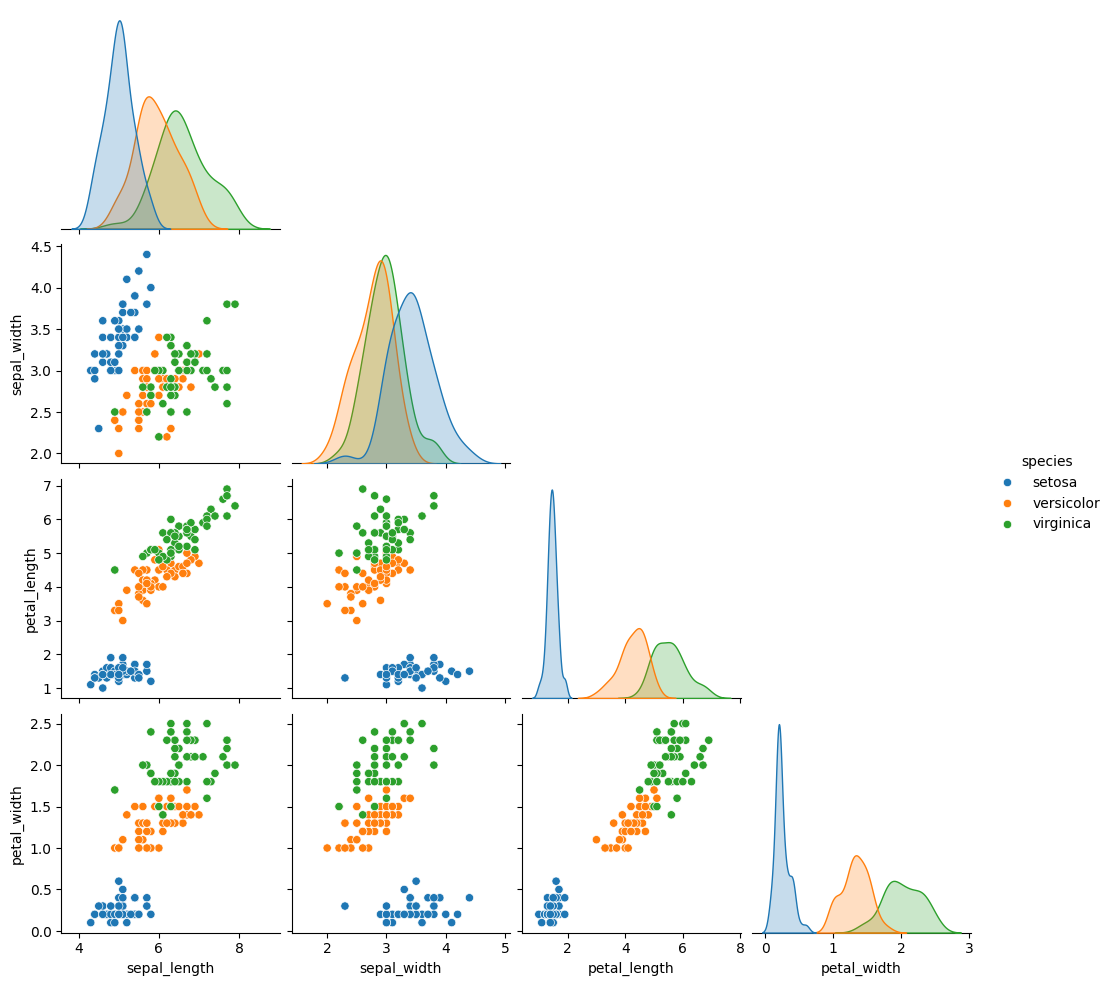

In [ ]:
sns.pairplot(iris, hue='species', corner=True)
plt.show()

The pairwise scatterplots reveal clear clustering by species, especially on petal dimensions